In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Population Growth model with a constant harvesting factor

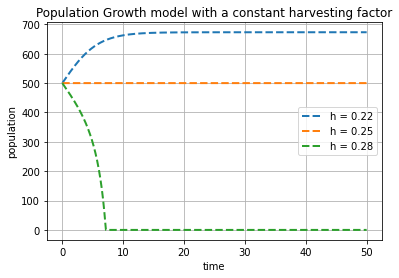

In [65]:
def constant_harvesting(n0,tau,dt,harv_factor,carrying_capacity,growth_rate):
  t=np.arange(0,tau+dt,dt)
  x=np.zeros(len(t))
  x[0]=n0

  for h in harv_factor:
    for i in range(1,len(t)):
      x[i]=x[i-1]+dt*(growth_rate*x[i-1]*(1-x[i-1]/carrying_capacity)-h)
      if x[i]<0:
        x[i]=0

    plt.plot(t,x,lw=2,ls='--',label=f'h = {h/(carrying_capacity*growth_rate)}')
    plt.xlabel('time')
    plt.ylabel('population')
    plt.title('Population Growth model with a constant harvesting factor')
    plt.legend()
    plt.grid(True)
  

  return x


carrying_capacity=1000
growth_rate=1
initial_population=500
t=50
dt=0.01
h=np.array([220,250,280])

# n0=initial_population/carrying_capacity
# harv_factor=h/(carrying_capacity*growth_rate)
# tau=growth_rate*t

x1=constant_harvesting(initial_population,t,dt,h,carrying_capacity,growth_rate)



### Population Growth model with a dynamic harvesting factor

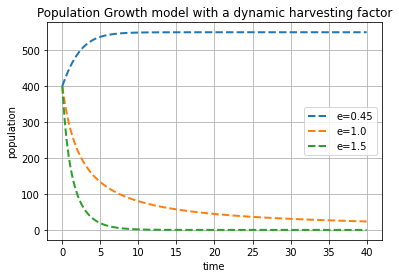

In [3]:
def dynamic_harvesting(n0,tau,dt,carrying_capacity,epsilon,growth_rate):
  t=np.arange(0,tau+dt,dt)
  x=np.zeros(len(t))
  x[0]=n0

  for e in epsilon:
    for i in range(1,len(t)):
      x[i]=x[i-1]+dt*(x[i-1]*(1-x[i-1])-e*x[i-1])
      if x[i]<0:
        x[i]=0
    
    plt.plot(t,x*1000,lw=2,ls='--',label=f'e={e/growth_rate}')
    plt.xlabel('time')
    plt.ylabel('population')
    plt.legend()
    plt.title('Population Growth model with a dynamic harvesting factor')
    plt.grid(True)
  
  return x

carrying_capacity=1
growth_rate=1
initial_population=0.4
t=40
dt=0.01
#h=0.1
epsilon=np.array([0.45,1,1.5])

# n0=initial_population/carrying_capacity
# harv_factor=h/(carrying_capacity*growth_rate)
# epsilon=epsilon/(growth_rate)
# tau=growth_rate*t

x2=dynamic_harvesting(initial_population,t,dt,carrying_capacity,epsilon,growth_rate)

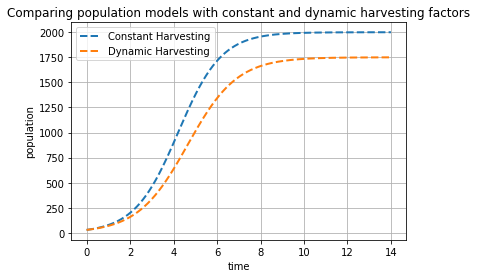

In [ ]:
plt.figure(1)
plt.plot(np.arange(0,tau+dt,dt),x1*carrying_capacity,lw=2,ls='--',label='Constant Harvesting')
plt.plot(np.arange(0,tau+dt,dt),x2*carrying_capacity,lw=2,ls='--',label='Dynamic Harvesting')
plt.legend()
plt.xlabel('time')
plt.ylabel('population')
plt.title('Comparing population models with constant and dynamic harvesting factors')
plt.grid(True)

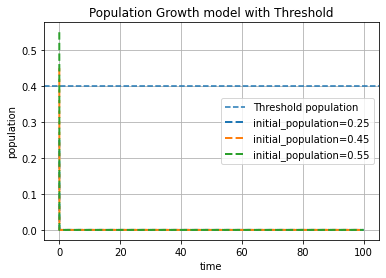

In [23]:
def constant_harvesting_with_threshold(n0,tau,dt,carrying_capacity,nthresh,growth_rate):
  t=np.arange(0,tau+dt,dt)
  x=np.zeros(len(t))

  plt.axhline(nthresh,label='Threshold population',ls='--')
  for j in range(len(n0)):
    x[0]=n0[j]
    for i in range(1,len(t)):
      x[i]=x[i-1]+dt*x[i-1]*(1-x[i-1])*(x[i-1]-nthresh)-h*dt
      if x[i]<0:
        x[i]=0
    
    plt.plot(t,x,lw=2,ls='--',label=f'initial_population={n0[j]}')
    plt.xlabel('time')
    plt.ylabel('population')
    plt.title('Population Growth model with Threshold')
    plt.legend()
    plt.grid(True)

  return x

carrying_capacity=1000
growth_rate=1
initial_population=np.array([250,450,550])
threshold_population=400
t=100
dt=0.01
h=50
#epsilon=0.125

n0=initial_population/carrying_capacity
harv_factor=h/(carrying_capacity*growth_rate)
tau=growth_rate*t
nthresh=threshold_population/carrying_capacity

x3=constant_harvesting_with_threshold(n0,tau,dt,carrying_capacity,nthresh,growth_rate)


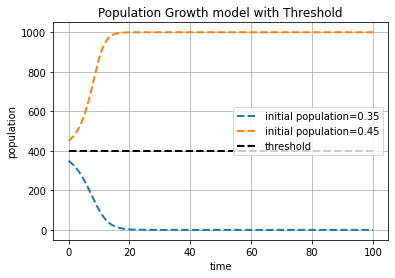

In [57]:
def dynamic_harvesting_with_threshold(n0,tau,dt,epsilon,carrying_capacity,nthresh,growth_rate):
  t=np.arange(0,tau+dt,dt)
  x=np.zeros(len(t))

  plt.hlines(nthresh*carrying_capacity,0,100,label='threshold',lw=2,ls='--')
  for j in n0:
    x[0]=j
    for i in range(1,len(t)):
      x[i]=x[i-1]+dt*x[i-1]*(1-x[i-1])*(x[i-1]-nthresh)
    
    plt.plot(t,x*carrying_capacity,lw=2,label=f'initial population={j}',ls='--')
    plt.xlabel('time')
    plt.ylabel('population')
    plt.title('Population Growth model with Threshold')
    plt.legend()
    plt.grid(True)

  return x

carrying_capacity=1000
growth_rate=2
initial_population=np.array([350,450])
threshold_population=400
t=50
dt=0.01
#h=np.array([0.01,0.1,0.3])
epsilon=0.02

n0=initial_population/carrying_capacity
#harv_factor=h/(carrying_capacity*growth_rate)
tau=growth_rate*t
nthresh=threshold_population/carrying_capacity

x3=dynamic_harvesting_with_threshold(n0,tau,dt,epsilon,carrying_capacity,nthresh,growth_rate)


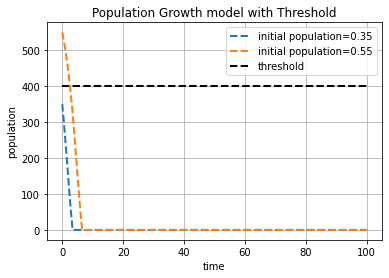

In [54]:
def constant_harvesting_with_threshold(n0,tau,dt,h,carrying_capacity,nthresh,growth_rate):
  t=np.arange(0,tau+dt,dt)
  x=np.zeros(len(t))

  plt.hlines(nthresh*carrying_capacity,0,100,label='threshold',lw=2,ls='--')
  for j in n0:
    x[0]=j
    for i in range(1,len(t)):
      x[i]=x[i-1]+dt*x[i-1]*(1-x[i-1])*(x[i-1]-nthresh)-h*dt
      if x[i]<0:
        x[i]=0
    
    plt.plot(t,x*carrying_capacity,lw=2,label=f'initial population={j}',ls='--')
    plt.xlabel('time')
    plt.ylabel('population')
    plt.title('Population Growth model with Threshold')
    plt.legend()
    plt.grid(True)

  return x

carrying_capacity=1000
growth_rate=2
initial_population=np.array([350,550])
threshold_population=400
t=50
dt=0.01
h=0.08
#epsilon=0.04

n0=initial_population/carrying_capacity
harv_factor=h/(carrying_capacity*growth_rate)
tau=growth_rate*t
nthresh=threshold_population/carrying_capacity

x3=constant_harvesting_with_threshold(n0,tau,dt,h,carrying_capacity,nthresh,growth_rate)
